  범죄대분류 범죄중분류    범죄소분류  구속-현행범체포  구속-긴급체포  구속-사전영장  구속-체포  불구속-불구속입건  \
0  강력범죄  살인기수       살인        52      120       10     14         91   
1  강력범죄  살인기수     영아살해         0        2        1      0          8   
2  강력범죄  살인기수     존속살해         7       14        0      2          3   
3  강력범죄  살인기수  촉탁·승낙살인         0        0        0      0          1   
4  강력범죄  살인기수  자살교사·방조         0        1        1      0         24   

   불구속-검사기각  불구속-판사기각  불구속-적부심석방  불구속-검사구속취소  
0         0         1          0           0  
1         0         0          0           0  
2         0         0          0           0  
3         0         0          0           0  
4         1         1          0           0  


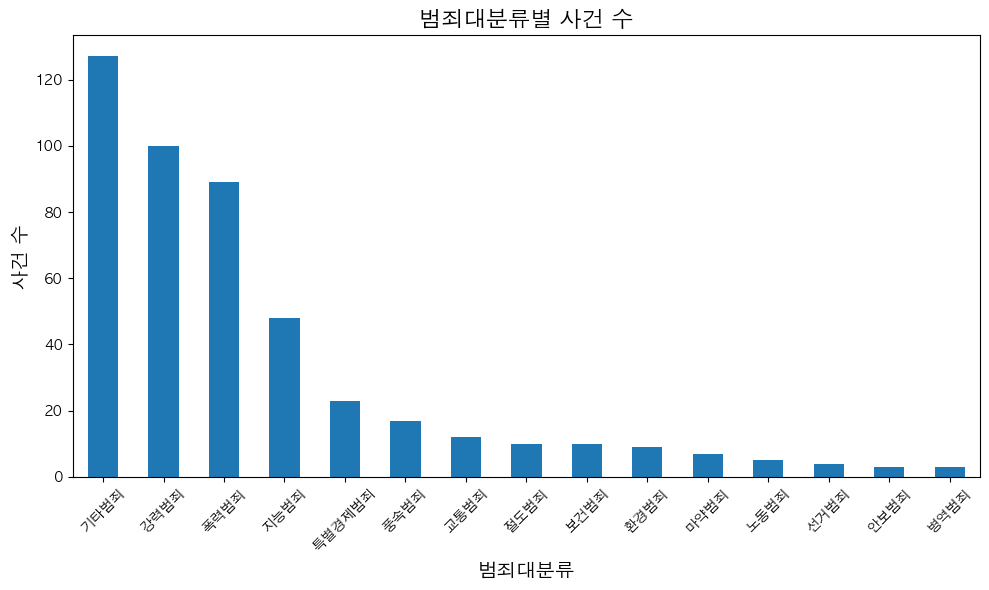

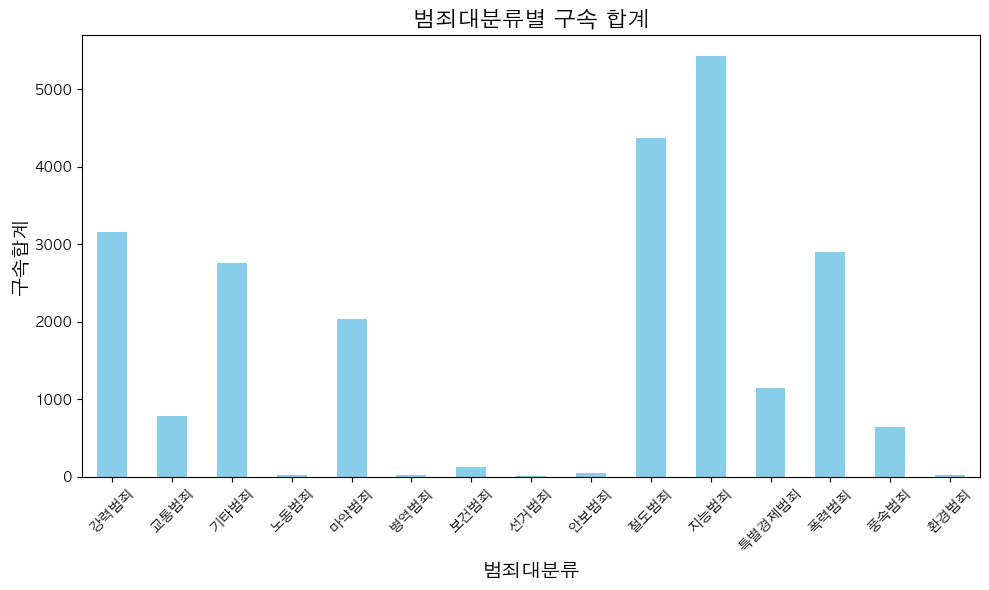

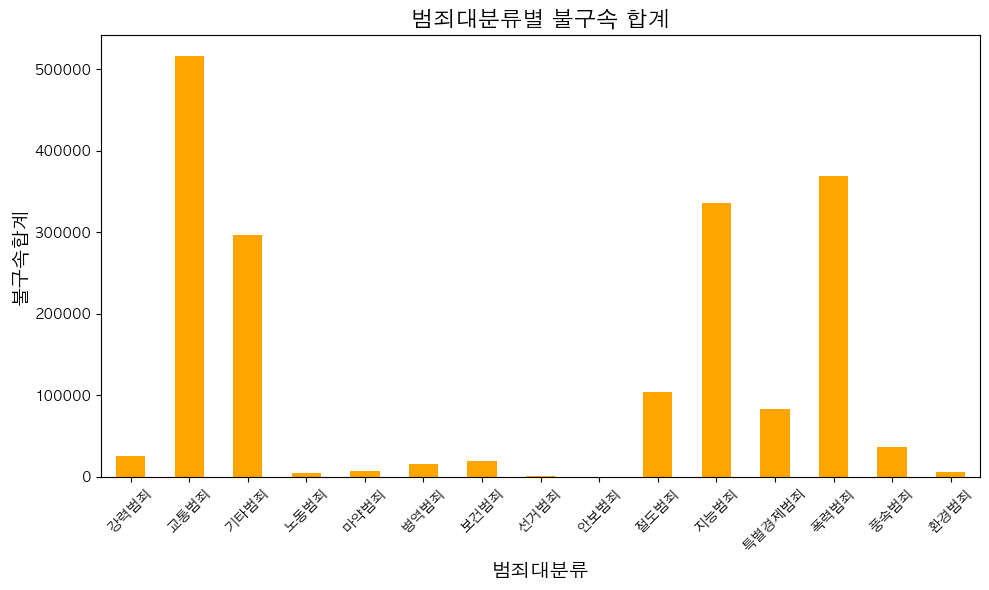

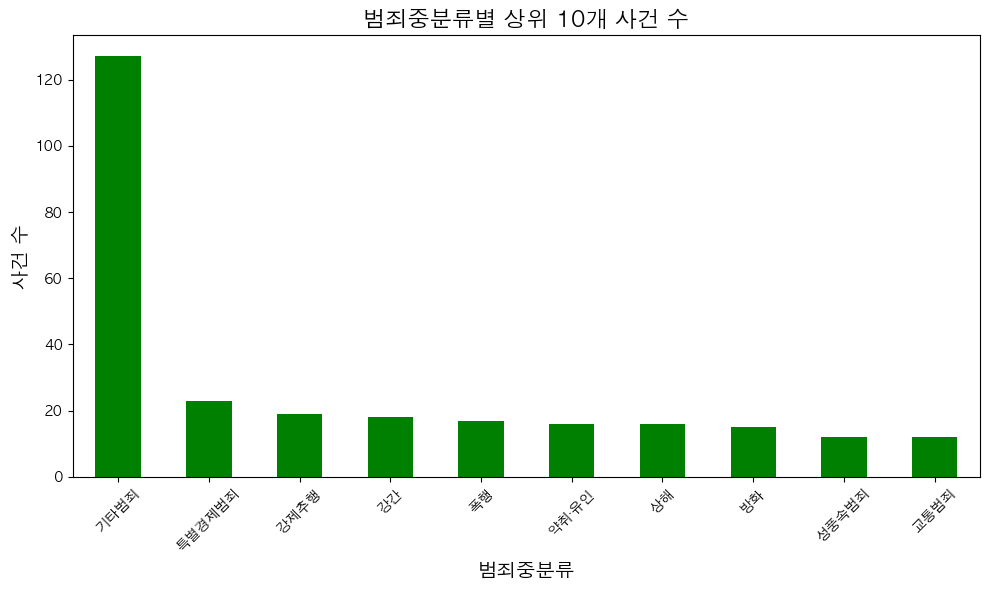

        구속-현행범체포  구속-긴급체포  구속-사전영장  불구속-불구속입건  불구속-검사기각
범죄대분류                                                  
강력범죄         738     1041      784      25903        98
교통범죄          73      114      494     515533        62
기타범죄        1172      333      591     295435       247
노동범죄           2        2        3       5215         0
마약범죄         341      624      118       6744        41
병역범죄           0        1        5      16363         1
보건범죄          13       17       68      20120        15
선거범죄           6        2        2        794         0
안보범죄           1        6       10        220         2
절도범죄         573     1987      322     103670       180
지능범죄         900      699     1112     335793       275
특별경제범죄       546      169      176      82820        56
폭력범죄        1224      407      561     367889       195
풍속범죄         120       62      109      36828        34
환경범죄           1        1       11       5919         0


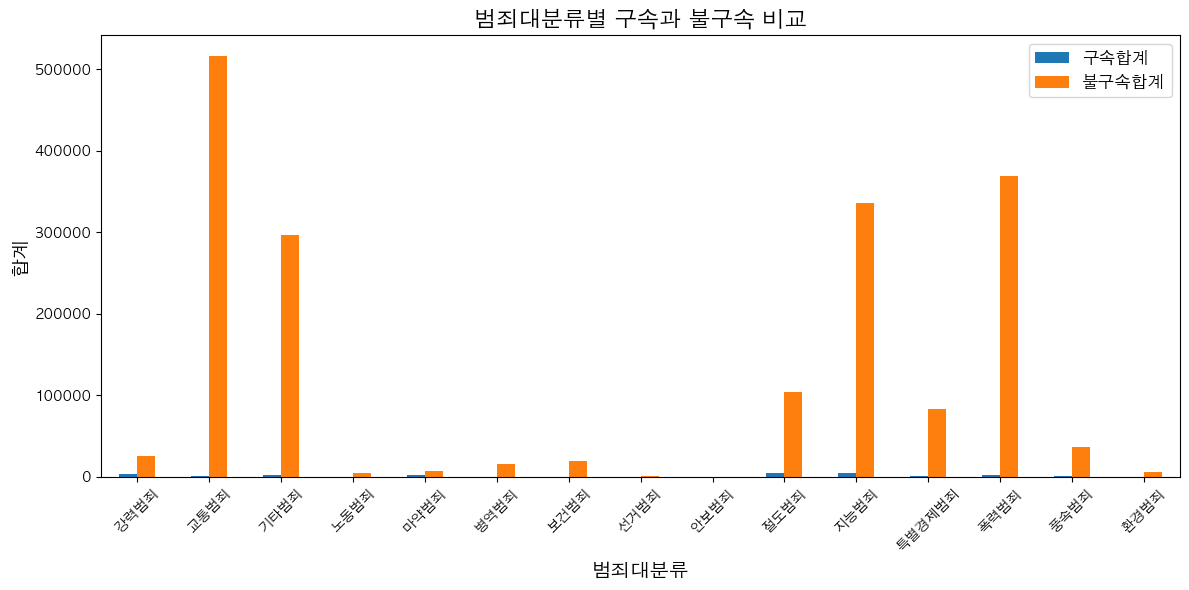

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows: 'Malgun Gothic', Mac: 'AppleGothic', Linux: 적합한 한글 폰트 경로 필요)
# plt.rc('font', family='Malgun Gothic')  # Windows
plt.rc('font', family='AppleGothic')  # Mac
# plt.rc('font', family='NanumGothic')  # Linux

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# CSV 데이터를 DataFrame으로 읽기 (위 데이터 형식에 맞게 파일 경로를 설정하세요)
data = pd.read_csv('경찰청_범죄자_구속_불구속_현황_20171231.csv', encoding='cp949')

# 데이터 살펴보기
print(data.head())

# 1. 범죄대분류별 사건 수 시각화
def plot_major_crime_categories():
    major_crime_counts = data['범죄대분류'].value_counts()
    major_crime_counts.plot(kind='bar', figsize=(10, 6))
    plt.title('범죄대분류별 사건 수', fontsize=16)
    plt.ylabel('사건 수', fontsize=14)
    plt.xlabel('범죄대분류', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_major_crime_categories()

# 2. 범죄대분류와 구속 여부에 따른 합계 분석
def analyze_arrest_by_major_category():
    arrest_columns = ['구속-현행범체포', '구속-긴급체포', '구속-사전영장', '구속-체포']
    data['구속합계'] = data[arrest_columns].sum(axis=1)
    grouped_data = data.groupby('범죄대분류')['구속합계'].sum()
    grouped_data.plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title('범죄대분류별 구속 합계', fontsize=16)
    plt.ylabel('구속합계', fontsize=14)
    plt.xlabel('범죄대분류', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

analyze_arrest_by_major_category()

# 3. 범죄대분류와 불구속 여부에 따른 합계 분석
def analyze_non_arrest_by_major_category():
    non_arrest_columns = ['불구속-불구속입건', '불구속-검사기각', '불구속-판사기각', '불구속-적부심석방', '불구속-검사구속취소']
    data['불구속합계'] = data[non_arrest_columns].sum(axis=1)
    grouped_data = data.groupby('범죄대분류')['불구속합계'].sum()
    grouped_data.plot(kind='bar', figsize=(10, 6), color='orange')
    plt.title('범죄대분류별 불구속 합계', fontsize=16)
    plt.ylabel('불구속합계', fontsize=14)
    plt.xlabel('범죄대분류', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

analyze_non_arrest_by_major_category()

# 4. 범죄중분류별 사건 수 분석
def analyze_minor_crime_categories():
    minor_crime_counts = data['범죄중분류'].value_counts().head(10)  # 상위 10개만
    minor_crime_counts.plot(kind='bar', figsize=(10, 6), color='green')
    plt.title('범죄중분류별 상위 10개 사건 수', fontsize=16)
    plt.ylabel('사건 수', fontsize=14)
    plt.xlabel('범죄중분류', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

analyze_minor_crime_categories()

# 5. 데이터 요약 테이블 생성
def create_summary_table():
    summary_table = data.groupby('범죄대분류').agg({
        '구속-현행범체포': 'sum',
        '구속-긴급체포': 'sum',
        '구속-사전영장': 'sum',
        '불구속-불구속입건': 'sum',
        '불구속-검사기각': 'sum',
    })
    print(summary_table)

create_summary_table()

# 6. 구속과 불구속 데이터 비교 시각화
def compare_arrest_non_arrest():
    grouped_data = data.groupby('범죄대분류')[['구속합계', '불구속합계']].sum()
    grouped_data.plot(kind='bar', figsize=(12, 6))
    plt.title('범죄대분류별 구속과 불구속 비교', fontsize=16)
    plt.ylabel('합계', fontsize=14)
    plt.xlabel('범죄대분류', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(['구속합계', '불구속합계'], fontsize=12)
    plt.tight_layout()
    plt.show()

compare_arrest_non_arrest()
